In [7]:
import numpy as onp
import matplotlib.pyplot as plt
import plotutils
from utils import data_path
save_path = data_path.parent / "figures/Poisson"

In [8]:
l2_pinn = []
l2_xpinn = []

for i in range(1, 11):
    file = f"pinn/results/L2_errors_{i}.npz"
    fp = onp.load(file)
    l2_pinn.append(fp["arr_0"])

    file = f"xpinn/results/L2_errors_{i}.npz"
    fp = onp.load(file)
    l2_xpinn.append(fp["arr_0"])

l2_pinn = onp.array(l2_pinn)
l2_xpinn = onp.array(l2_xpinn)

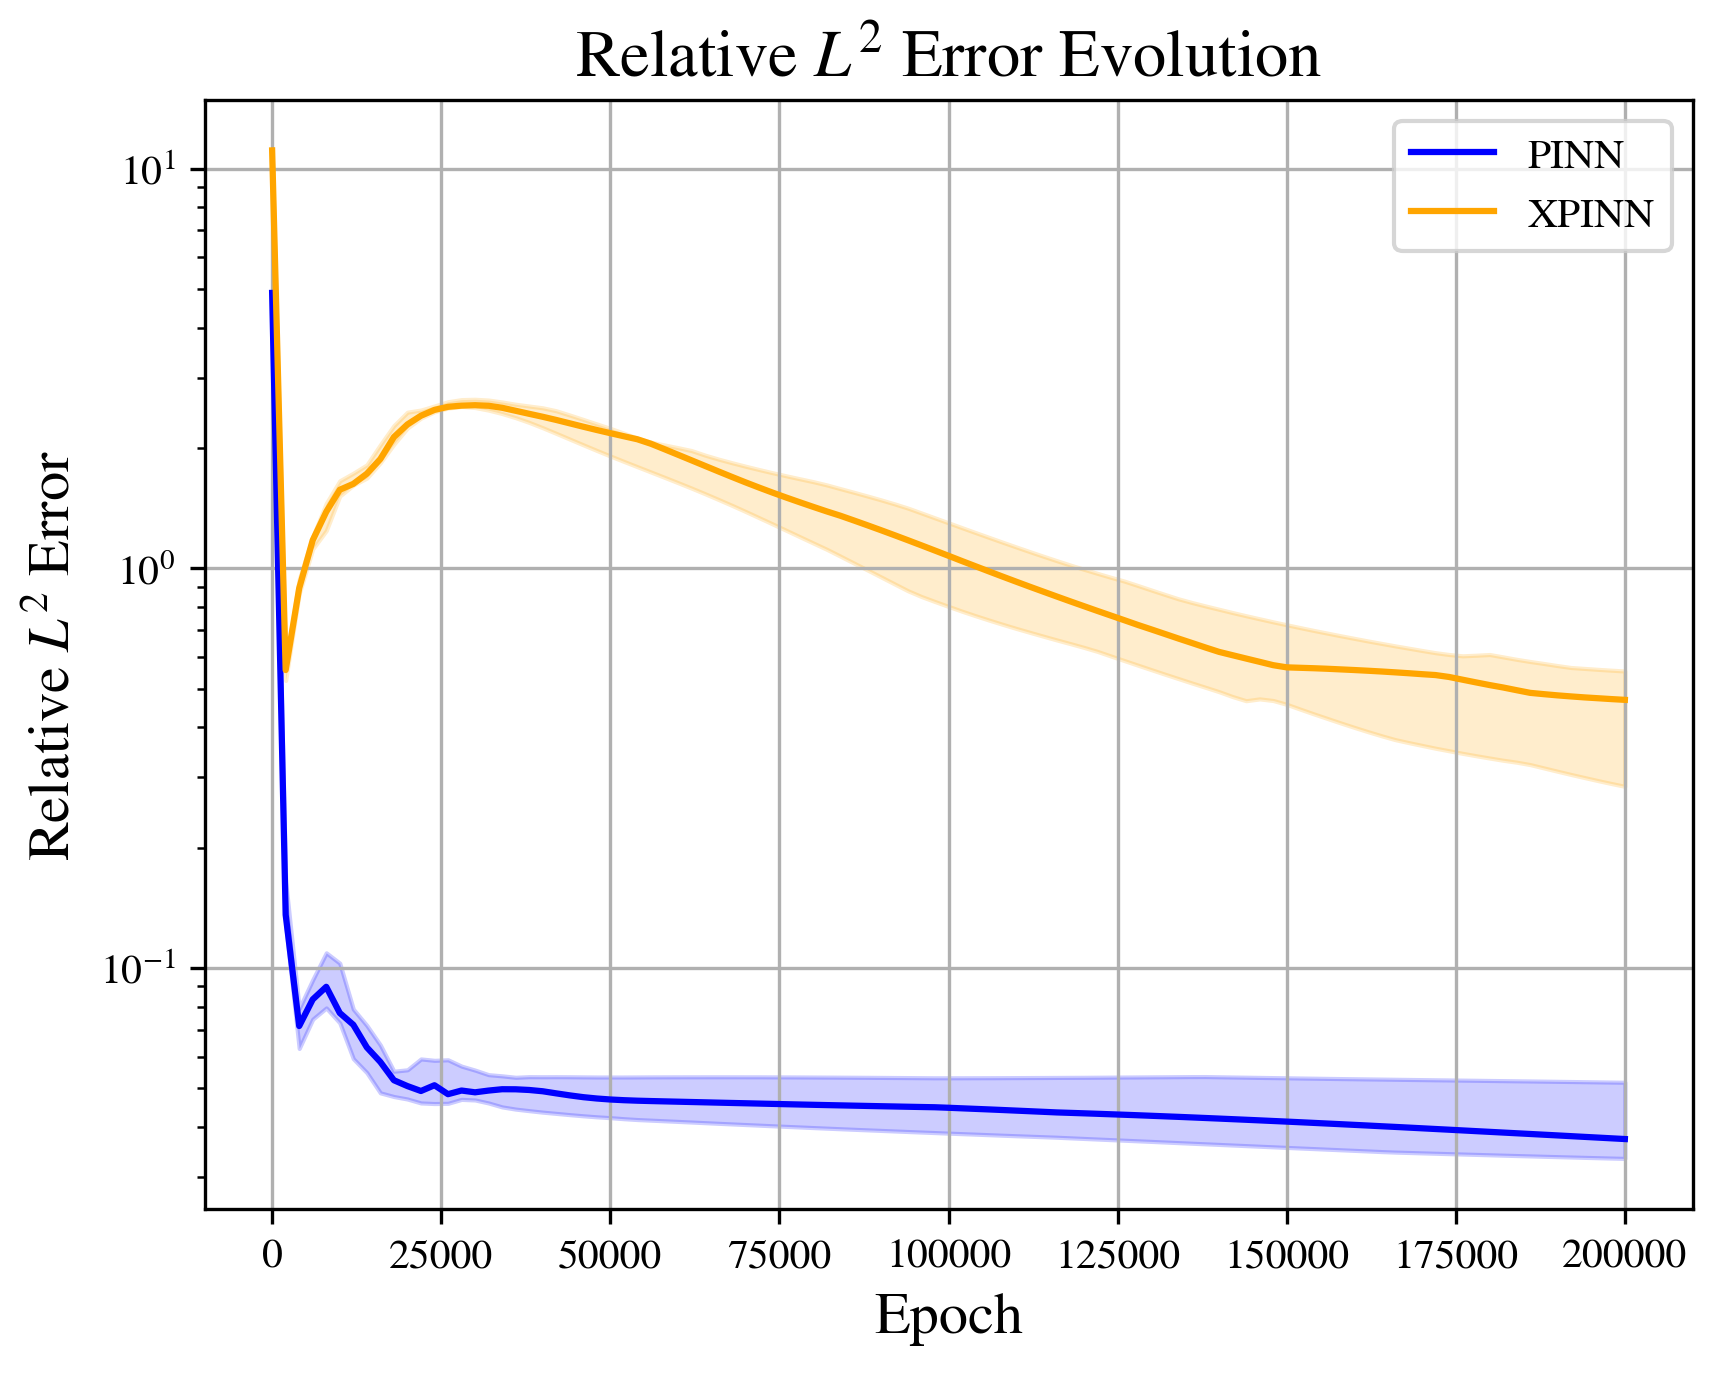

In [9]:
import numpy as np
import matplotlib.pyplot as plt

piterations = np.linspace(0, 200000, 101)
xiterations = np.linspace(0, 200000, 101)

pmedians = np.median(l2_pinn, axis=0)
pq1 = np.percentile(l2_pinn, 25, axis=0)
pq3 = np.percentile(l2_pinn, 75, axis=0)


xmedians = np.median(l2_xpinn, axis=0)
xq1 = np.percentile(l2_xpinn, 25, axis=0)
xq3 = np.percentile(l2_xpinn, 75, axis=0)

# Plot
plt.figure()
plt.plot(piterations, pmedians, color="blue", label="PINN")
plt.fill_between(piterations, pq1, pq3, color="blue", alpha=0.2)
plt.plot(xiterations, xmedians, color="orange", label="XPINN")
plt.fill_between(xiterations, xq1, xq3, color="orange", alpha=0.2)
plt.xlabel("Epoch")
plt.ylabel("Relative $L^2$ Error")
plt.yscale("log")
plt.title("Relative $L^2$ Error Evolution")
plt.legend()
plt.grid(True)

plt.savefig(save_path / "discrete_l2_error_evolution.pdf", bbox_inches='tight')
plt.show()